# 4주차: 열역학시스템(카르노기관)

## 1. 열역학 시스템 소개

### 열기관

- 열기관: 열에너지를 운동에너지로 변환시키는 기관  
열 흡수 -> [열 기관] -> 일+ 열 방출  
T_h, q_h -> [열기관] -> -W + T_l, q_l  

- $열효율 \epsilon = \frac{외부로 가하는 일}{흡수된 열} = \frac{-W}{q_h}$

## 2. 카르노 사이클을 통해 열과 일의 변환 이해
### 카르노 기관의 열 및 일 그리기 및 계산

V_A, P_A = 10 2.4615
V_B, P_B = 20 1.23075
V_C, P_C = 25 0.8485025583221572
V_D, P_D = 12.5 1.697005116644314


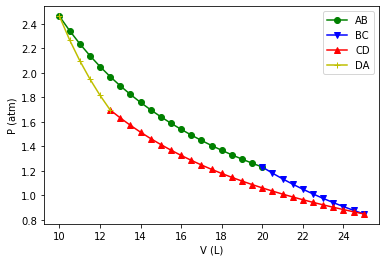

In [13]:
from scipy.integrate import quad
import numpy as np
import matplotlib.pyplot as plt

R = 0.08205
gamma = 5/3

def P_consT(V,P1,V1):
    return P1*(V1/V)

def P_adiab(V,P1,V1):
    return P1*(V1/V)**gamma


V_A = 10
V_B = 20
V_C = 25
V_D = V_C*V_A/V_B

n = 1
T_h = 300

P_A = n*R*T_h/V_A
P_B = n*R*T_h/V_B
P_C = P_B*(V_B/V_C)**gamma

T_l = P_C*V_C/n/R

P_D = n*R*T_l/V_D

print('V_A, P_A =', V_A, P_A)
print('V_B, P_B =', V_B, P_B)
print('V_C, P_C =', V_C, P_C)
print('V_D, P_D =', V_D, P_D)

V_AB = np.arange(V_A,V_B+0.5,0.5)  # 포인트 하나 더 그리기
V_BC = np.arange(V_B,V_C+0.5,0.5)
V_CD = np.arange(V_D,V_C+0.5,0.5)
V_DA = np.arange(V_A,V_D+0.5,0.5)


plt.plot(V_AB, P_consT(V_AB,P_A,V_A), 'go-', label='AB')
plt.plot(V_BC, P_adiab(V_BC,P_B,V_B), 'bv-', label='BC')
plt.plot(V_CD, P_consT(V_CD,P_D,V_D), 'r^-', label='CD')
plt.plot(V_DA, P_adiab(V_DA,P_A,V_A), 'y+-', label='DA')


plt.legend()
plt.xlabel('V (L)')
plt.ylabel('P (atm)')
plt.show()

## 3. 카르노 사이클 효율 계산하기

In [18]:
w_AB = -quad(P_consT, V_A, V_B, args=(P_A,V_A))[0]
w_BC = -quad(P_adiab, V_B, V_C, args=(P_B,V_B))[0]
w_CD = -quad(P_consT, V_C, V_D, args=(P_C,V_C))[0]
w_DA = -quad(P_adiab, V_D, V_A, args=(P_D,V_D))[0]
w_total = w_AB+w_BC+w_CD+w_DA

q_AB = -w_AB
q_BC = 0
q_CD = -w_CD
q_DA = 0

print('w_AB ,q_AB =', w_AB, q_AB)
print('w_BC ,q_BC =', w_BC, q_BC)
print('w_CD ,q_CD =', w_CD, q_CD)
print('w_DA ,q_DA =', w_DA, q_DA, '\n')
print('w_total =', w_total)
print('w_total -> 음수 -> 일을 하고 있다.', '\n')

efficiency = -w_total/q_AB
print('efficiency = ', efficiency)

w_AB ,q_AB = -17.061817849483056 17.061817849483056
w_BC ,q_BC = -5.103654062919109 0
w_CD ,q_CD = 14.703428899972593 -14.703428899972593
w_DA ,q_DA = 5.103654062919109 0 

w_total = -2.358388949510463
w_total -> 음수 -> 일을 하고 있다. 

efficiency =  0.13822612398724665
